# **Dataset & Description**



[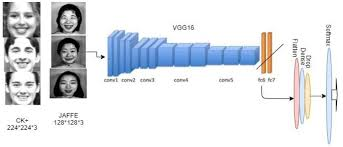](http://)


The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of 28,709 examples and the public test set consists of 3,589 examples.








[Dataset link ](https://www.kaggle.com/msambare/fer2013)

# Import necessary python libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sn
# import skimage.io
# import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization,Activation,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model, Sequential
# from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Data Preprocessing

In [ ]:
batch_size = 128
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,                                  
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

In [ ]:
train_dataset  = train_datagen.flow_from_directory(directory = 'Dataset/train',
                                                   target_size = (48,48),
                                                   color_mode = "grayscale",
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = batch_size)

In [ ]:
valid_dataset = valid_datagen.flow_from_directory(directory = 'Dataset/train',
                                                  target_size = (48,48),
                                                  color_mode = "grayscale",
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = batch_size)

In [ ]:
test_dataset = test_datagen.flow_from_directory(directory = 'Dataset/test',
                                                  target_size = (48,48),
                                                  color_mode = "grayscale",
                                                  class_mode = 'categorical',
                                                  batch_size = batch_size)

# Building the Classical CNN Model

In [ ]:
no_of_classes=7

model=Sequential()

#First Convulational Neural Network Layer
model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu")) #Rectifier linear is defined because all the neurons aren't triggered at the same time. 
model.add(MaxPooling2D(pool_size=(2,2)))  #Extracts important information from ROI
model.add(Dropout(0.25))  #Used for preventing our model to get overfitted. 


#Second Convulational Neural Network Layer
model.add(Conv2D(128,(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Third Convulational Neural Network Layer
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Fourth Convulational Neural Network Layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) #Collapse all the input data to 1 Dimensional Array 

#Fully connected First Layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected Second Layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation="softmax"))

# opt = Adam(learning_rate = 0.0001)
# model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [ ]:
# Model Summary

model.summary()

In [ ]:
lrd = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)


mcp = ModelCheckpoint('Models/cb_classic_cnn.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

es = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True #restoring the best model
                          )

In [26]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs = 100,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/100
180/180 [==============================] - 265s 1s/step - loss: 1.9540 - accuracy: 0.2191 - val_loss: 1.8371 - val_accuracy: 0.1730 - lr: 0.0010
Epoch 2/100
180/180 [==============================] - 284s 2s/step - loss: 1.8405 - accuracy: 0.2447 - val_loss: 1.9050 - val_accuracy: 0.1683 - lr: 0.0010
Epoch 3/100
180/180 [==============================] - 729s 4s/step - loss: 1.7542 - accuracy: 0.2923 - val_loss: 1.8916 - val_accuracy: 0.2674 - lr: 0.0010
Epoch 4/100
180/180 [==============================] - 486s 3s/step - loss: 1.6715 - accuracy: 0.3357 - val_loss: 1.6992 - val_accuracy: 0.3247 - lr: 0.0010
Epoch 5/100
180/180 [==============================] - 389s 2s/step - loss: 1.6050 - accuracy: 0.3685 - val_loss: 2.1157 - val_accuracy: 0.2928 - lr: 0.0010
Epoch 6/100
180/180 [==============================] - 409s 2s/step - loss: 1.5492 - accuracy: 0.3957 - val_loss: 1.6815 - val_accuracy: 0.3862 - lr: 0.0010
Epoch 7/100
180/180 [==============================] - 367

In [28]:
model.save('Models/classic_cnn.h5')

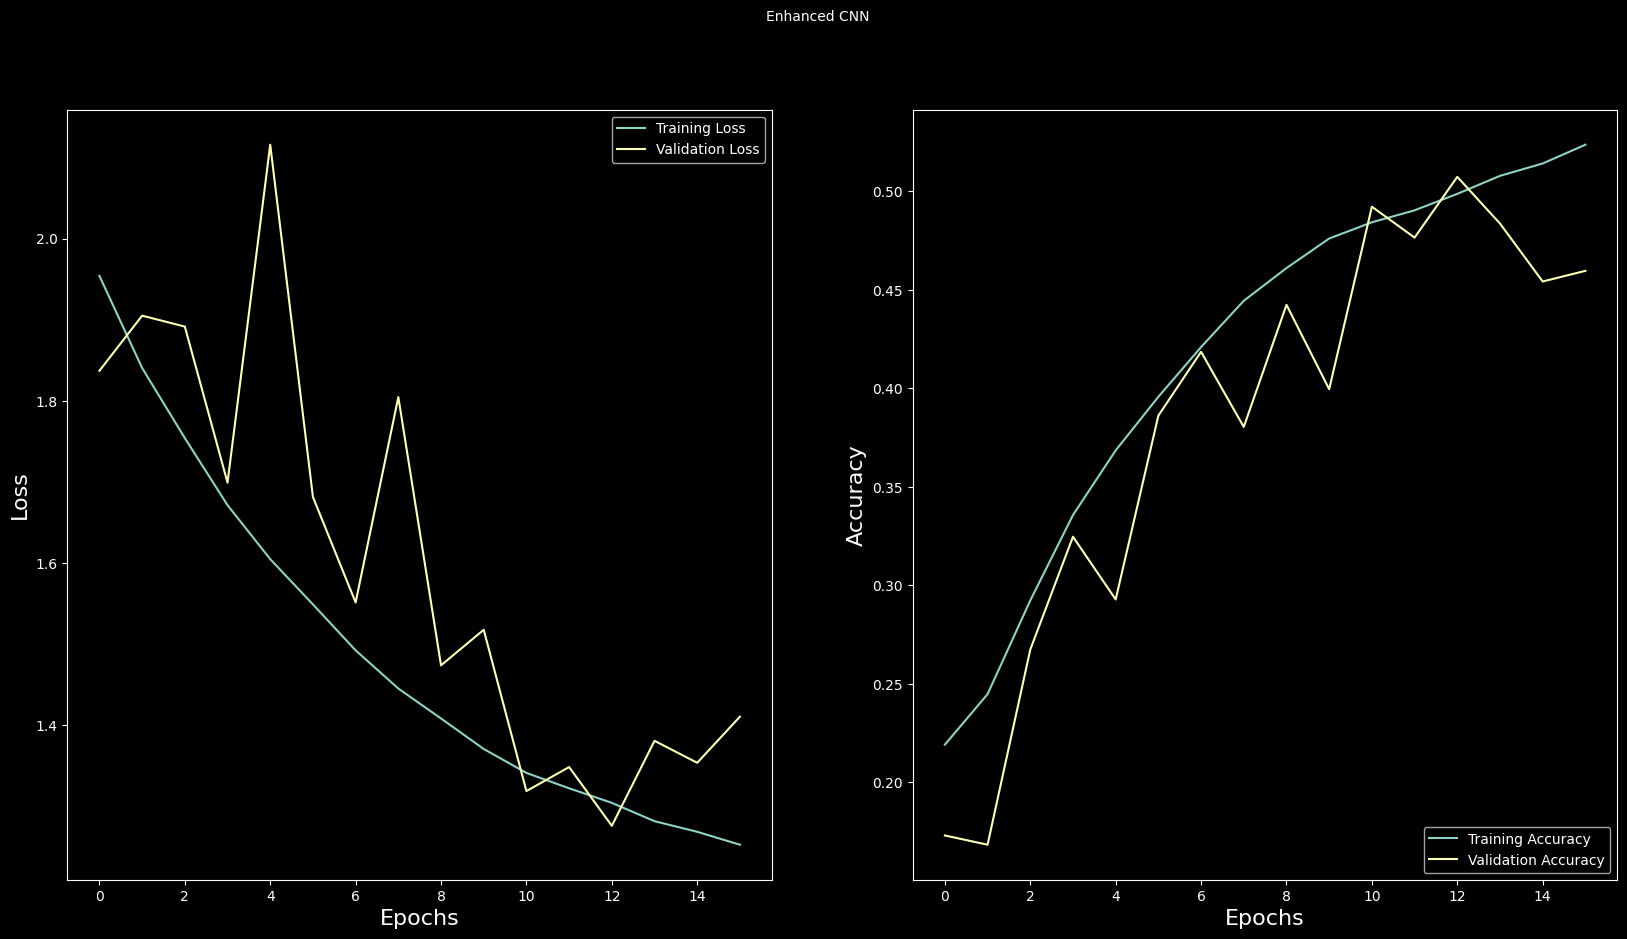

In [35]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Enhanced CNN', fontsize=10)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Load a model

In [30]:
from tensorflow.keras.models import load_model

model = load_model('Models/classic_cnn.h5', compile = True)

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

# Test a model

In [32]:
results = model.evaluate(test_dataset)
results

57/57 [==============================] - 21s 352ms/step - loss: 1.2701 - accuracy: 0.5116


[1.2700783014297485, 0.5115631222724915]

# Create Confusion Matrix

In [33]:
# Finding prediction for the test dataset
predictions = model.predict(test_dataset)

# Categorizing test dataset based on predictions
test_prediction = []
for i in range(test_dataset.samples):
    idx = np.argmax(predictions[i])
    test_prediction.append(idx)

57/57 [==============================] - 20s 351ms/step


In [34]:
# Defining labels of Confusion Matrix
emotions = test_dataset.class_indices

# Creating Confusion matrix
res = tf.math.confusion_matrix(test_prediction, test_dataset.classes).numpy()
cm = pd.DataFrame(res, index=emotions, columns=emotions)
cm

,angry,disgust,fear,happy,neutral,sad,surprise
angry,138,23,162,282,204,183,148
disgust,0,0,2,0,0,0,0
fear,21,3,18,35,31,32,18
happy,200,17,202,381,248,252,172
neutral,282,27,307,545,367,379,243
sad,110,15,101,185,149,152,93
surprise,207,26,232,346,234,249,157
